## Regression 

### Simple Linear Regression

Linear regression is  a linear or straight line relationship between the input variables (X) and the single output variable (y).

<img src='images/lr.png' width="45%"/>

### Let us consider a dataset where we have a value of response y for every feature x:

In [1]:
import numpy as np
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

### x as a feature vector and y as a response vector

### A scatter plot of above dataset looks like:-

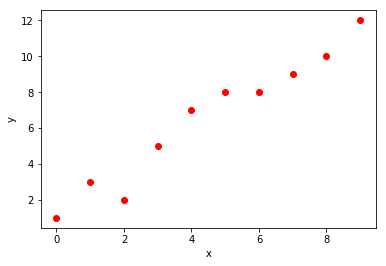

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')
# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)

- This line is called regression line.

<img src="images/lin_reg.PNG" width="20%"/>
<img src="images/bfind.PNG" width="90%"/>

In [ ]:
### find m and b

In [49]:
def find_m_b(x,y):
    m= (((np.mean(x)*np.mean(y))-np.mean(x*y))/
        ((np.mean(x)**2)-np.mean(x**2)))
    b = np.mean(y) - m*np.mean(x)
   
    return m,b

In [50]:
m,b = find_m_b(x,y)
print (m,b)

1.1696969696969695 1.2363636363636372


In [45]:
y

array([ 1,  3,  2,  5,  7,  8,  8,  9, 10, 12])

In [46]:
print(m,b)

1.1696969696969695 1.2363636363636372


In [47]:
m=1.2
b=.1

In [51]:
reg=[]
#y=mx+b
for i in x:
    reg.append((m*i+b))

In [30]:
#y

In [31]:
reg

[0.1,
 1.3,
 2.5,
 3.6999999999999997,
 4.8999999999999995,
 6.1,
 7.299999999999999,
 8.5,
 9.7,
 10.899999999999999]

In [32]:
import pandas as pd

In [33]:
df = pd.DataFrame(x,columns=['X'])
df['y']=y
df['y_pred']=reg

In [34]:
df

,X,y,y_pred
0,0,1,0.1
1,1,3,1.3
2,2,2,2.5
3,3,5,3.7
4,4,7,4.9
5,5,8,6.1
6,6,8,7.3
7,7,9,8.5
8,8,10,9.7
9,9,12,10.9


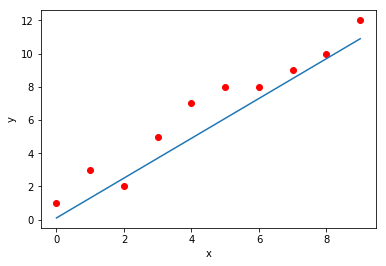

In [35]:
# for visualization
plt.scatter(x,y,color='red')

plt.plot(x, reg)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
rss = sum((y-reg)**2)
rss

15.700000000000008

In [38]:
#MSE
MSE = sum((y-reg)**2)/len(x)

In [39]:
MSE

1.5700000000000007

In [ ]:
rss

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score


### R^2 (coefficient of determination):regression score function.


- The R^2 (or R Squared) metric provides an indication
  of the goodness of fit of a set of predictions to the
  actual values. In statistical literature,
  this measure is called the coefficient of determination.

- a model fits the data well if the differences between the
  observed values and the model's predicted values are small.

- R-squared is a statistical measure of how close the data
  are  to the fitted regression line.

- the higher the R-squared, the better the model fits your
  data.

- value between 0 and 1 

- The distance between the regression line's y values,
  and the data's y values is the error, then we square that. 


<img src='images/r2.PNG' width='40%'/>

### 1-((sum of the squared error of the line) / (sum of squared error of the y mean))

- **SE line** = (y1-(mx1+b))+(y2-(mx2+b))+.....(yn-(mxn+b))


- **SE y mean** = (y1-mean(y))+(y2-mean(y))+....(yn-mean(y))

if SE line is small ==> line is a good fit or r^2 close to 1

if SE line is large ===> r^2 close to 0 (i.e line is not fitted well)



<img src="images/rsq.png" />

In [52]:
def squared_error(ys_original,ys_line):
    return sum((ys_line-ys_original)**2)

In [53]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean=[]
    for i in ys_orig:
        y_mean.append(np.mean(ys_orig))
        
    #y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [54]:
r_squared = coefficient_of_determination(y,reg)
print(r_squared)

0.952538038613988


### Now Using scikit-learn...

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
x_new=x.reshape(-1,1)

In [57]:
lg = LinearRegression()
lg.fit(x_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
lg.coef_

array([1.16969697])

In [59]:
lg.intercept_

1.2363636363636363

In [60]:
y_pred=lg.predict(x_new)

#y_true,y_pred
r2_score(y,y_pred)

0.952538038613988

In [61]:
mean_squared_error(y,y_pred)

0.5624242424242423

In [ ]:
y_pred

### Take another example

In [62]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
#r2_score:for checking regression model performance

In [63]:
data = pd.read_csv('dataset/Salary_Data.csv')

In [64]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [65]:
data.shape

(30, 2)

In [ ]:
data.iloc[:,0].values

In [ ]:
#print data.columns

In [75]:
X = data.iloc[:,0].values

In [76]:
y = data['Salary'].values

In [77]:
X.ndim

1

### split data into training and testing test

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=8,
                                                 random_state=10)

In [80]:
y_test

array([ 91738.,  54445.,  56642.,  37731.,  43525.,  98273.,  57081.,
       112635.])

In [81]:
X_train.ndim

1

In [82]:
import warnings

In [83]:
warnings.filterwarnings('ignore')

In [84]:
X_new=X_train.reshape(-1,1)
X_test_new = X_test.reshape(-1,1)

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lin_reg = LinearRegression()  #model/algorithm

#train model using training data 
lin_reg.fit(X_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
lin_reg.coef_

array([9371.74034704])

In [88]:
lin_reg.intercept_

26490.605890536055

In [89]:
y_pred = lin_reg.predict(X_test_new)

In [90]:
y_test

array([ 91738.,  54445.,  56642.,  37731.,  43525.,  98273.,  57081.,
       112635.])

In [91]:
y_pred

array([ 90218.4402504 ,  56480.17500106,  53668.65289695,  40548.2164111 ,
        45234.08658461,  93029.96235452,  64914.7413134 , 116459.31322211])

In [92]:
#actual,pred
r2_score(y_test,y_pred)

0.9760442172946989

In [ ]:
X_test_new[0]

In [ ]:
(lin_reg.coef_[0]*X_test_new[0])+lin_reg.intercept_

In [ ]:
y_pred[0]

In [ ]:
#!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#plt.figure(figsize=(10,8))
plt.scatter(X_train,y_train,color='red')   #training data

plt.scatter(X_test,y_pred,color='black')   #testing data
plt.plot(X_train,lin_reg.predict(X_train.reshape(-1,1)),color='green')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()